In [1]:
!pip uninstall scikit-learn -y

!pip install -U scikit-learn

Found existing installation: scikit-learn 0.24.2
Uninstalling scikit-learn-0.24.2:
  Successfully uninstalled scikit-learn-0.24.2
  Using cached scikit_learn-0.24.2-cp37-cp37m-manylinux2010_x86_64.whl (22.3 MB)


In [2]:

import random 
import pandas as pd
import numpy as np
import re
import string
import nltk
from nltk.corpus import stopwords,gutenberg
from nltk.tokenize import RegexpTokenizer
from nltk.probability import FreqDist
from collections import Counter
from sklearn import datasets
from sklearn.model_selection import ShuffleSplit,KFold,cross_val_score,train_test_split
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
from sklearn import svm
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import wordcloud
from sklearn.decomposition import LatentDirichletAllocation
#___________________________________________ Setup ___________________________________
nltk.download('gutenberg')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.corpus.gutenberg.fileids()
print("Done")

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
Done


# Clean Data

In [3]:
import gdown
url_1 = 'https://drive.google.com/uc?id=1Vo8vNZlkAV5ckxPcU3OHMkJ2mVbZJfUS'
output_1 = 'mob_scrape.csv'
gdown.download(url_1,output=output_1,quiet=False)


Downloading...
From: https://drive.google.com/uc?id=1Vo8vNZlkAV5ckxPcU3OHMkJ2mVbZJfUS
To: /content/mob_scrape.csv
100%|██████████| 262k/262k [00:00<00:00, 64.7MB/s]


'mob_scrape.csv'

In [4]:
df=pd.read_csv("mob_scrape.csv",sep=",")
index = df.index
condition = df["Dish"] == "SERIOUSLY PASTA SIX WAYS"
indices = index[condition]
indices_list = indices.tolist()
print(indices_list)
df = df.drop([169,84])
df.to_excel("output.xlsx")
df["Ingredients"]
df = df.reset_index()


[84]


In [5]:
def remove_s(s):
    result =s.replace("covers absolutely everything assume beforehand", "")
  
    return result

In [6]:
def remove_numbers(s):
    result = ''.join([i for i in s if not i.isdigit()])
    return result

In [7]:
def remove_single(s):
    result = ' '.join([w for w in s.split() if len(w) > 1])
    return result

In [8]:
stop = stopwords.words('english')
other_stop = [
    'kg',
    'grams',
    'cans',
    'of',
    'bags',
    'tbsp',
    'tsp',
    'pinch',
    'pint',
    'pack',
    'packs',
    'fresh',
    'large',
    'small',
    'gram',
    'tins',
    'knob',
    'chopped',
    'smoked',
    'extra',
    'very',
    'lazy',
    'crushed',
    'ml',
    'litre',
    'bunch',
    'dried',
    'teaspoon',
    'dried',
    'tablespoon',
    'tablespoons',
    'bag',
    'half',
    'red',
    'green',
    'yellow',
    'pink',
    'orange',
    'total cost  covers absolutely everything',
    'tbsps'
    "mob's",
    'creamy',
    'curshed',
    'flat',
    'jar',
    'tin',
    'pitted',
    'bottle',
    'seasoning',
    'only',
    "n'",
    'salt',
     'olive', 
     'pepper',
    'toasted',
    'giant',
    'sliced',
    'diced',
    'minced',
    'knob',
    'knobs',
    'method',
    'frozen',
    'skinless',
    'boneless',
    'loaf',
    'grated',
    'jar',
    'nice',
    'good',
    'total',
    'deli',
     'kitchen',
    'cost',
]
stop.extend(other_stop)

symbols = ['.', '£', '-', '!', '(', ')', ':', ',',"'",']','[']

In [9]:
def remove_stop(s, fuzzy=False):
    words = s.split(' ')
    if fuzzy:
        out = []
        for i in words:
            include = True
            for st in stop:
                if fuzz.ratio(words, stop) > 50:
                    include = False
            if include:
                out.append(i)
        return ' '.join(out)
    elif not fuzzy:
        result = ' '.join([i for i in words if i not in stop])
        return result


def remove_symbol(s):
    for i in symbols:
        s = s.replace(i, "")
    return s.strip()

In [10]:
def extract_entities(s):
    l_words = str(s).lower().split('\n')

    l_words = [remove_numbers(s) for s in l_words]
    l_words = [remove_single(s) for s in l_words]
    l_words = [remove_stop(s) for s in l_words]
    l_words = [remove_symbol(s) for s in l_words]
    l_words = [remove_s(s) for s in l_words]
    l_words = [i for i in l_words if i != '']
    return l_words

In [11]:
ing_entities = df["Ingredients"].map(extract_entities).to_list()
title_entities = df["Dish"].map(extract_entities).to_list()

In [12]:
for i in range(len(df["Ingredients"])):
  df["Ingredients"]=df["Ingredients"].replace(to_replace =df["Ingredients"][i], value =str(ing_entities[i])[1:-1])

In [13]:
df_new=df[['Dish', 'Ingredients',"URL"]].copy()
df_new.rename(columns={'Dish': 'name', 'Ingredients': 'ingredients'}, inplace=True)
df_new.to_csv("newdata.CSV",index=False)


# Clustering



In [14]:
import random 
import pandas as pd
import numpy as np
import re
import string
import nltk
from nltk.corpus import stopwords,gutenberg
from nltk.tokenize import RegexpTokenizer
from nltk.probability import FreqDist
from collections import Counter
from sklearn import datasets
from sklearn.model_selection import ShuffleSplit,KFold,cross_val_score,train_test_split
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import wordcloud
from sklearn.cluster import k_means
from sklearn.cluster import KMeans
import matplotlib.pyplot as mtp    
from sklearn.metrics import cohen_kappa_score
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.mixture import GaussianMixture
from sklearn.metrics import homogeneity_score
from tqdm import tqdm
#___________________________________________ Setup ___________________________________
nltk.download('gutenberg')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.corpus.gutenberg.fileids()
print("Done")

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
Done


In [15]:
X= df_new["ingredients"]

In [16]:
# BOW transformer
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X).todense()
#print(X_train_counts)
print("Data dimensions before PCA with BOW:",X_train_counts.shape)
from sklearn.decomposition import PCA
#perform PCA to plot 
pca = PCA(n_components=2)
pca.fit(X_train_counts)
BOW_2Dtransformed_data=pca.transform(X_train_counts)
print("Data dimensions after PCA with BOW:",BOW_2Dtransformed_data.shape)
#print(BOW_2Dtransformed_data)

Data dimensions before PCA with BOW: (412, 852)
Data dimensions after PCA with BOW: (412, 2)


In [17]:
#TF-IDF transform
from sklearn.feature_extraction.text import TfidfTransformer
tf_transformer = TfidfTransformer(use_idf=True).fit(X_train_counts)
X_train_tfidf = tf_transformer.transform(X_train_counts).todense()
print("Data dimensions before PCA with TFIDF and BOW:",X_train_tfidf.shape)

pca = PCA(n_components=2)
pca.fit(X_train_tfidf)
tfidf_2Dtransformed_data=pca.transform(X_train_tfidf)
print("Data dimensions after PCA with TFIDF and BOW:",tfidf_2Dtransformed_data.shape)
#print(tfidf_2Dtransformed_data)

Data dimensions before PCA with TFIDF and BOW: (412, 852)
Data dimensions after PCA with TFIDF and BOW: (412, 2)


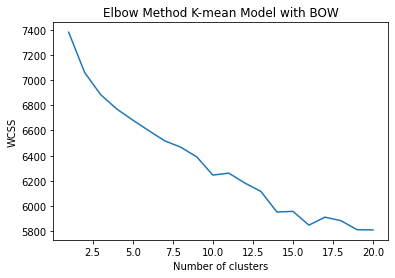

[2 2 2 0 4 4 2 2 0 2 0 4 4 2 4 1 2 2 0 4 0 4 2 0 0 4 4 2 2 2 2 0 4 0 2 2 1
 0 2 0 2 4 0 1 1 4 4 0 0 2 1 4 2 0 0 4 1 2 2 1 0 2 0 4 1 2 2 0 3 4 2 2 2 4
 1 2 4 4 1 4 2 2 2 2 2 1 2 1 2 1 2 4 3 4 1 1 2 1 4 2 2 2 2 4 4 1 2 2 2 2 1
 1 4 1 0 2 0 2 2 0 1 0 1 4 2 2 2 2 4 4 2 2 4 0 4 1 2 2 4 4 1 1 4 1 2 4 1 0
 2 4 0 0 3 4 4 4 2 0 2 0 2 4 4 4 4 2 4 2 2 1 0 4 4 2 2 4 4 2 0 0 2 4 0 1 2
 1 0 0 2 0 4 2 2 1 1 1 0 4 0 0 0 2 2 0 2 0 1 2 2 2 1 0 0 1 2 2 2 1 1 2 0 0
 2 2 2 2 2 0 2 1 2 0 2 2 2 0 1 0 4 1 2 2 1 1 2 2 2 1 1 1 2 0 0 1 1 2 2 4 1
 2 4 2 2 4 0 4 1 1 2 2 4 4 2 0 4 2 4 0 2 2 1 2 2 2 2 2 1 0 2 0 2 4 2 2 2 2
 2 2 2 0 4 4 2 1 2 0 2 0 4 1 2 2 4 1 2 1 2 2 1 1 1 1 0 1 2 1 2 1 2 1 1 2 1
 2 0 1 2 2 2 0 2 2 0 1 2 0 2 1 2 0 2 1 1 2 0 0 2 2 1 1 2 0 2 1 0 2 2 2 2 2
 2 2 2 2 2 2 0 2 1 2 1 0 0 0 2 2 4 1 2 2 2 4 2 1 0 4 2 2 2 2 2 2 4 2 2 1 2
 2 2 2 1 2]


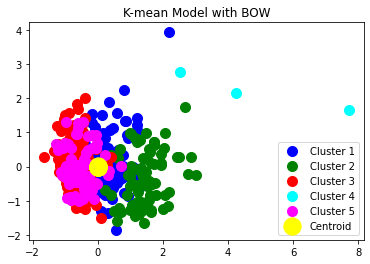

In [18]:
wcss = []
for i in range(1, 21):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_train_counts)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 21), wcss)
plt.title('Elbow Method K-mean Model with BOW')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=50, random_state=0)
pred_y = kmeans.fit_predict(X_train_counts)
#plt.scatter(BOW[:,0], BOW[:,1])
#plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

y_predict= kmeans.fit_predict(X_train_counts)  
print(y_predict)

mtp.scatter(BOW_2Dtransformed_data[y_predict == 0, 0], BOW_2Dtransformed_data[y_predict == 0, 1], s = 100, c = 'blue', label = 'Cluster 1') #for first cluster  
mtp.scatter(BOW_2Dtransformed_data[y_predict == 1, 0], BOW_2Dtransformed_data[y_predict == 1, 1], s = 100, c = 'green', label = 'Cluster 2') #for second cluster  
mtp.scatter(BOW_2Dtransformed_data[y_predict == 2, 0], BOW_2Dtransformed_data[y_predict == 2, 1], s = 100, c = 'red', label = 'Cluster 3') #for third cluster  
mtp.scatter(BOW_2Dtransformed_data[y_predict == 3, 0], BOW_2Dtransformed_data[y_predict == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4') #for fourth cluster  
mtp.scatter(BOW_2Dtransformed_data[y_predict == 4, 0], BOW_2Dtransformed_data[y_predict == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5') #for fifth cluster  
mtp.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroid')   
mtp.title('K-mean Model with BOW')  
  
mtp.legend()  
mtp.show()

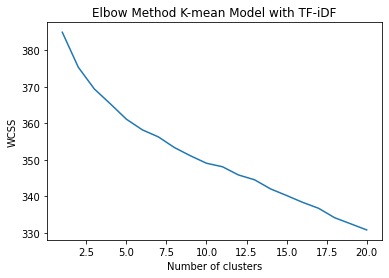

[2 2 2 4 2 2 2 1 4 1 3 2 2 2 2 0 1 2 0 2 2 2 1 3 4 2 2 2 2 2 2 3 2 3 0 1 0
 3 2 4 1 2 3 0 2 2 2 3 3 2 0 2 2 3 3 2 0 1 2 0 4 0 4 2 4 1 3 4 0 2 2 1 1 2
 0 2 4 2 0 2 1 2 1 1 2 0 1 0 1 0 1 2 4 2 0 0 1 0 3 2 2 1 1 2 2 0 1 1 1 1 0
 0 2 0 3 1 3 2 2 3 0 3 0 2 1 2 1 1 4 2 1 1 3 0 2 0 1 2 2 2 0 0 4 0 1 2 0 3
 2 2 4 4 0 2 4 2 2 4 1 4 1 2 2 4 2 2 2 2 2 0 0 2 2 1 2 2 1 2 4 3 2 2 4 0 2
 0 0 4 1 4 2 3 2 0 0 0 4 2 3 4 4 1 2 3 2 3 0 1 2 1 0 4 3 0 2 2 2 0 0 1 4 3
 4 1 2 1 2 4 1 4 2 4 2 4 1 3 0 4 2 0 2 2 0 0 2 2 1 0 0 4 2 3 3 0 4 1 2 2 0
 2 2 2 1 2 3 2 0 0 2 2 2 2 2 4 4 2 2 4 2 3 0 1 4 2 2 2 0 3 4 4 2 2 4 3 0 1
 2 1 1 3 2 2 2 0 4 4 1 4 2 0 4 1 2 0 2 0 2 2 0 0 0 0 3 0 2 0 2 0 2 0 0 2 4
 4 4 0 2 2 2 3 3 2 3 0 1 4 1 0 2 4 4 0 0 2 3 4 4 1 0 0 2 4 2 0 3 2 1 1 2 1
 1 4 2 1 3 2 3 1 0 1 0 3 4 3 2 2 2 0 2 2 2 2 1 0 3 2 1 1 1 2 2 2 2 2 4 0 2
 0 1 1 0 2]


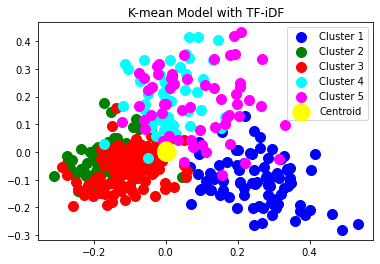

In [19]:

wcss = []
for i in range(1, 21):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_train_tfidf)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 21), wcss)
plt.title('Elbow Method K-mean Model with TF-iDF')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=50, random_state=0)
pred_y = kmeans.fit_predict(X_train_tfidf)
#plt.scatter(X_train_tfidf[:,0], X_train_tfidf[:,1])
#plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

y_predict= kmeans.fit_predict(X_train_tfidf)  
print(y_predict)

mtp.scatter(tfidf_2Dtransformed_data[y_predict == 0, 0], tfidf_2Dtransformed_data[y_predict == 0, 1], s = 100, c = 'blue', label = 'Cluster 1') #for first cluster  
mtp.scatter(tfidf_2Dtransformed_data[y_predict == 1, 0], tfidf_2Dtransformed_data[y_predict == 1, 1], s = 100, c = 'green', label = 'Cluster 2') #for second cluster  
mtp.scatter(tfidf_2Dtransformed_data[y_predict == 2, 0], tfidf_2Dtransformed_data[y_predict == 2, 1], s = 100, c = 'red', label = 'Cluster 3') #for third cluster  
mtp.scatter(tfidf_2Dtransformed_data[y_predict == 3, 0], tfidf_2Dtransformed_data[y_predict == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4') #for fourth cluster  
mtp.scatter(tfidf_2Dtransformed_data[y_predict == 4, 0], tfidf_2Dtransformed_data[y_predict == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5') #for fifth cluster  
mtp.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroid')   
mtp.title('K-mean Model with TF-iDF')  
  
mtp.legend()  
mtp.show() 

In [20]:
clusters=pd.DataFrame({"ing":X,"class":y_predict})
clusters.to_csv("class.csv")

In [21]:
clas_0=[]
clas_1=[]
clas_2=[]
clas_3=[]
clas_4=[]
num=[]
for i in range(len(clusters["class"])):
  if clusters.iloc[i][1] ==0:
    clas_0.append(clusters.iloc[i][0])
    num.append(0)
  elif clusters.iloc[i][1] ==1:
    clas_1.append(clusters.iloc[i][0])
    num.append(1)
  elif clusters.iloc[i][1] ==2:
    clas_2.append(clusters.iloc[i][0])
    num.append(2)
  elif clusters.iloc[i][1] ==3:
    clas_3.append(clusters.iloc[i][0])
    num.append(3)
  else:
    clas_4.append(clusters.iloc[i][0])
    num.append(4)

In [22]:
clusters.sort_values("class")

,ing,class
111,"'soba noodles', 'chicken breasts', 'peppers re...",0
335,"'carrots', 'brown onion', 'garlic', 'ginger', ...",0
140,"'garlic cloves', 'skinless chicken thighs', 'c...",0
141,"'aubergines', 'ginger', 'chilli', 'star anise'...",0
74,"'peppers yellow red', 'beetroots', 'aubergine'...",0
...,...,...
361,"'couscous', 'coriander', 'lemon', 'apricots', ...",4
142,"'rolled oats', 'almond milk', 'coconut milk', ...",4
304,"'ground cumin', 'fennel seeds', 'cayenne', 'or...",4
289,"'coriander', 'brown onion', 'chillies', 'garam...",4


**Top 10 of Items for each Class**

In [23]:
def most_frq(y):
  corpus = clusters[clusters["class"]==y]["ing"]
  corpus= corpus.reset_index()
  l=""
  for i in range(len(corpus)):
    l= l + corpus["ing"][i]
  for i in symbols:
    l=l.replace(i,'')
  from collections import Counter

  data_set = l  
  # split() returns list of all the words in the string
  split_it = data_set.split()
    
  # Pass the split_it list to instance of Counter class.
  Counter = Counter(split_it)
    
  # most_common() produces k frequently encountered
  # input values and their respective counts.
  most_occur = Counter.most_common(10)
  print(most_occur)
  item = []
  values = []
  for i,j in most_occur:
    item.append(i)
    values.append(j)
  fig = plt.figure(figsize = (10, 5))
  
  # creating the bar plot
  plt.bar(item, values, color ='maroon',
          width = 0.4)
  
  plt.xlabel("Items")
  plt.ylabel("Frequnecy")
  plt.title(" Top 10 of Items")
  plt.show()

[('sauce', 87), ('soy', 67), ('ginger', 62), ('rice', 56), ('coriander', 49), ('salt', 42), ('onions', 39), ('garlic', 36), ('chilli', 36), ('spring', 36)]


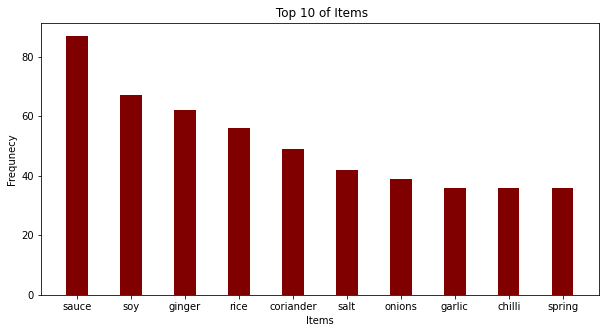

[('garlic', 49), ('tomatoes', 46), ('basil', 45), ('chilli', 34), ('salt', 31), ('flakes', 25), ('cloves', 20), ('parmesan', 19), ('lemon', 19), ('cherry', 17)]


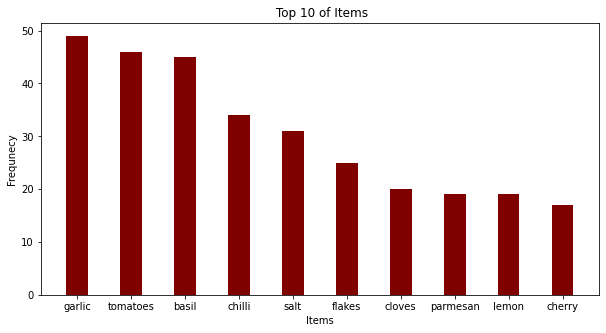

[('garlic', 85), ('salt', 71), ('parsley', 45), ('lemon', 45), ('cloves', 41), ('onion', 41), ('flour', 37), ('parmesan', 35), ('plain', 33), ('eggs', 33)]


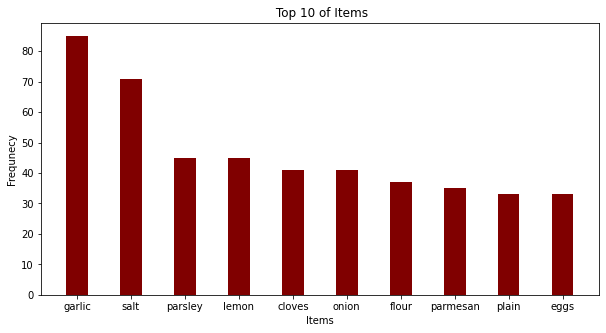

[('coriander', 34), ('peppers', 29), ('onion', 27), ('paprika', 25), ('garlic', 25), ('onions', 22), ('salt', 21), ('beans', 20), ('lime', 20), ('cumin', 17)]


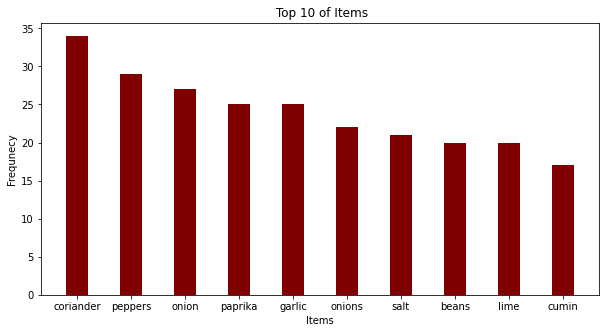

[('coriander', 45), ('garlic', 44), ('ginger', 30), ('salt', 30), ('coconut', 27), ('onion', 25), ('tomatoes', 25), ('ground', 22), ('chicken', 21), ('brown', 21)]


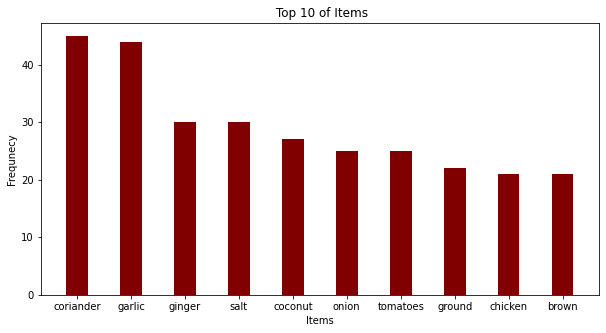

In [24]:
most_frq(0)
most_frq(1)
most_frq(2)
most_frq(3)
most_frq(4)

In [25]:
cuisine=[]
for i in clusters["class"]:
  if i == 0:
    cuisine.append("Chinese")
  elif i == 1:
    cuisine.append("French")
  elif i == 2:
    cuisine.append("Indian")
  elif i == 3:
    cuisine.append("Mexican")
  else:
    cuisine.append("Italian")
final_clusters=pd.DataFrame(([xx,yy,zz] for xx, yy,zz in zip(clusters["ing"],clusters["class"],cuisine)),columns = ["Ingredients","Class","Cuisine"])
final_clusters.to_csv("final_clusters.csv")

**Cuisine Comparison**

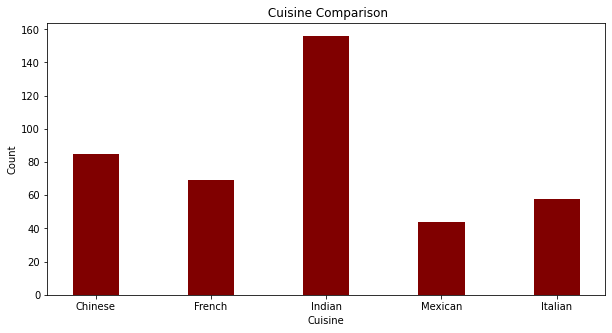

In [26]:
fig = plt.figure(figsize = (10, 5))
  
# creating the bar plot
plt.bar(["Chinese","French","Indian","Mexican","Italian"], [len(clas_0),len(clas_1),len(clas_2),len(clas_3),len(clas_4)], color ='maroon',
        width = 0.4)

plt.xlabel("Cuisine")
plt.ylabel("Count")
plt.title(" Cuisine Comparison")
plt.show()

# Classification

**Data Split** to ------------> train 70 % , test 30 % 


In [27]:
X, y = final_clusters["Ingredients"],final_clusters["Cuisine"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
X.shape, y.shape

((412,), (412,))

#Classification and Evaluation for KNN

Accuracy for KNN with BOW  : ->  0.7096774193548387
              precision    recall  f1-score   support

     Chinese       0.83      0.95      0.89        21
      French       0.49      0.96      0.65        23
      Indian       0.81      0.59      0.68        51
     Italian       0.80      0.42      0.55        19
     Mexican       1.00      0.80      0.89        10

    accuracy                           0.71       124
   macro avg       0.79      0.74      0.73       124
weighted avg       0.77      0.71      0.71       124



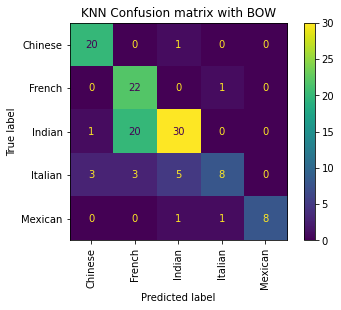


[The Accuracy by using cross validation]

Accuracy at Iteration with BOW: 1 -> 0.7619047619047619
Accuracy at Iteration with BOW: 2 -> 0.7619047619047619
Accuracy at Iteration with BOW: 3 -> 0.7073170731707317
Accuracy at Iteration with BOW: 4 -> 0.7560975609756098
Accuracy at Iteration with BOW: 5 -> 0.6585365853658537
Accuracy at Iteration with BOW: 6 -> 0.7317073170731707
Accuracy at Iteration with BOW: 7 -> 0.8780487804878049
Accuracy at Iteration with BOW: 8 -> 0.7804878048780488
Accuracy at Iteration with BOW: 9 -> 0.7804878048780488
Accuracy at Iteration with BOW: 10 -> 0.7073170731707317
Total accuracy: 0.75 (+/- 0.11)
Accuracy for KNN with BOW  and LDA : ->  0.532258064516129
              precision    recall  f1-score   support

     Chinese       0.64      1.00      0.78        21
      French       0.13      0.09      0.11        23
      Indian       0.58      0.63      0.60        51
     Italian       0.50      0.42      0.46        19
     Mexican       0.60      0.30 

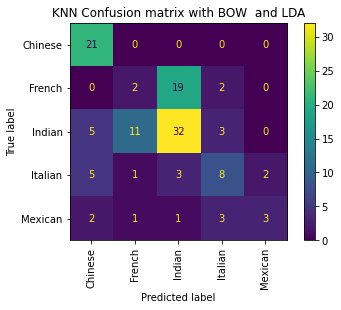


[The Accuracy by using cross validation]

Accuracy at Iteration with BOW  and LDA: 1 -> 0.4523809523809524
Accuracy at Iteration with BOW  and LDA: 2 -> 0.30952380952380953
Accuracy at Iteration with BOW  and LDA: 3 -> 0.5853658536585366
Accuracy at Iteration with BOW  and LDA: 4 -> 0.5609756097560976
Accuracy at Iteration with BOW  and LDA: 5 -> 0.4878048780487805
Accuracy at Iteration with BOW  and LDA: 6 -> 0.6585365853658537
Accuracy at Iteration with BOW  and LDA: 7 -> 0.5609756097560976
Accuracy at Iteration with BOW  and LDA: 8 -> 0.5853658536585366
Accuracy at Iteration with BOW  and LDA: 9 -> 0.4878048780487805
Accuracy at Iteration with BOW  and LDA: 10 -> 0.5365853658536586
Total accuracy: 0.52 (+/- 0.18)
Accuracy for KNN with BOW, TfIdf   and LDA : ->  0.45161290322580644
              precision    recall  f1-score   support

     Chinese       0.51      1.00      0.68        21
      French       0.24      0.35      0.29        23
      Indian       0.63      0.33      0.

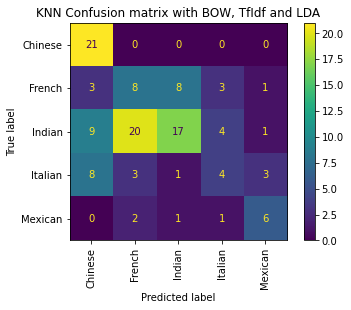


[The Accuracy by using cross validation]

Accuracy at Iteration with BOW ,TfIdf  and LDA: 1 -> 0.47619047619047616
Accuracy at Iteration with BOW ,TfIdf  and LDA: 2 -> 0.3333333333333333
Accuracy at Iteration with BOW ,TfIdf  and LDA: 3 -> 0.5609756097560976
Accuracy at Iteration with BOW ,TfIdf  and LDA: 4 -> 0.4146341463414634
Accuracy at Iteration with BOW ,TfIdf  and LDA: 5 -> 0.2682926829268293
Accuracy at Iteration with BOW ,TfIdf  and LDA: 6 -> 0.3170731707317073
Accuracy at Iteration with BOW ,TfIdf  and LDA: 7 -> 0.6097560975609756
Accuracy at Iteration with BOW ,TfIdf  and LDA: 8 -> 0.5121951219512195
Accuracy at Iteration with BOW ,TfIdf  and LDA: 9 -> 0.36585365853658536
Accuracy at Iteration with BOW ,TfIdf  and LDA: 10 -> 0.36585365853658536
Total accuracy: 0.42 (+/- 0.21)
Accuracy for KNN with BOW  and tfidf : ->  0.8064516129032258
              precision    recall  f1-score   support

     Chinese       0.66      1.00      0.79        21
      French       0.79      0

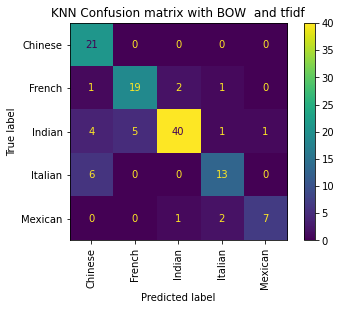


[The Accuracy by using cross validation]

Accuracy at Iteration with BOW  and tfidf: 1 -> 0.8333333333333334
Accuracy at Iteration with BOW  and tfidf: 2 -> 0.7619047619047619
Accuracy at Iteration with BOW  and tfidf: 3 -> 0.7317073170731707
Accuracy at Iteration with BOW  and tfidf: 4 -> 0.8292682926829268
Accuracy at Iteration with BOW  and tfidf: 5 -> 0.9024390243902439
Accuracy at Iteration with BOW  and tfidf: 6 -> 0.7073170731707317
Accuracy at Iteration with BOW  and tfidf: 7 -> 0.9024390243902439
Accuracy at Iteration with BOW  and tfidf: 8 -> 0.7317073170731707
Accuracy at Iteration with BOW  and tfidf: 9 -> 0.7560975609756098
Accuracy at Iteration with BOW  and tfidf: 10 -> 0.7804878048780488
Total accuracy: 0.79 (+/- 0.13)


In [28]:
#_____________KNN___________________
from sklearn import svm
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
from sklearn.decomposition import LatentDirichletAllocation
 #   ('lda',LatentDirichletAllocation(n_components=5,random_state=0)),
#plt.title("MultinomialNB Confusion matrix withBOW , LDA and tfidf")

#_____________KNN with BOW ___________________

text_clf_knn = Pipeline([
    ('vect', CountVectorizer()),
    ('clf', KNeighborsClassifier(n_neighbors=4),)
])
text_clf_knn.fit(X_train,y_train)
test_knn =X_test
predicted_knn = text_clf_knn.predict(test_knn)
print("Accuracy for KNN with BOW  : -> ",np.mean(predicted_knn == y_test))
print(metrics.classification_report(y_test, predicted_knn))
plot_confusion_matrix(text_clf_knn, X_test, y_test,xticks_rotation="vertical")
plt.title("KNN Confusion matrix with BOW")
plt.show()

print("\n[The Accuracy by using cross validation]\n")
cv = ShuffleSplit(n_splits=5, test_size=0.4, random_state=0)
kf = KFold(n_splits=10,shuffle=True,random_state=0)
scores_knn = cross_val_score(text_clf_knn, X, y, cv=kf)
num=0
for i in scores_knn:
  num+=1
  print("Accuracy at Iteration with BOW: %r ->"%(num),i)
print("Total accuracy: %0.2f (+/- %0.2f)" % (scores_knn.mean(), scores_knn.std() * 2))


#_____________KNN with BOW and LDA___________________

text_clf_knn = Pipeline([
    ('vect', CountVectorizer()),
    ('lda',LatentDirichletAllocation(n_components=5,random_state=0)),
    ('clf', KNeighborsClassifier(n_neighbors=4),)
])
text_clf_knn.fit(X_train,y_train)
test_knn =X_test
predicted_knn = text_clf_knn.predict(test_knn)
print("Accuracy for KNN with BOW  and LDA : -> ",np.mean(predicted_knn == y_test))
print(metrics.classification_report(y_test, predicted_knn))
plot_confusion_matrix(text_clf_knn, X_test, y_test,xticks_rotation="vertical")
plt.title("KNN Confusion matrix with BOW  and LDA")
plt.show()

print("\n[The Accuracy by using cross validation]\n")
cv = ShuffleSplit(n_splits=5, test_size=0.4, random_state=0)
kf = KFold(n_splits=10,shuffle=True,random_state=0)
scores_knn = cross_val_score(text_clf_knn, X, y, cv=kf)
num=0
for i in scores_knn:
  num+=1
  print("Accuracy at Iteration with BOW  and LDA: %r ->"%(num),i)
print("Total accuracy: %0.2f (+/- %0.2f)" % (scores_knn.mean(), scores_knn.std() * 2))
#_____________KNN with BOW ,TfIdf and LDA___________________

text_clf_knn = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('lda',LatentDirichletAllocation(n_components=5,random_state=0)),
    ('clf', KNeighborsClassifier(n_neighbors=4),)
])
text_clf_knn.fit(X_train,y_train)
test_knn =X_test
predicted_knn = text_clf_knn.predict(test_knn)
print("Accuracy for KNN with BOW, TfIdf   and LDA : -> ",np.mean(predicted_knn == y_test))
print(metrics.classification_report(y_test, predicted_knn))
plot_confusion_matrix(text_clf_knn, X_test, y_test,xticks_rotation="vertical")
plt.title("KNN Confusion matrix with BOW, TfIdf and LDA")
plt.show()

print("\n[The Accuracy by using cross validation]\n")
cv = ShuffleSplit(n_splits=5, test_size=0.4, random_state=0)
kf = KFold(n_splits=10,shuffle=True,random_state=0)
scores_knn = cross_val_score(text_clf_knn, X, y, cv=kf)
num=0
for i in scores_knn:
  num+=1
  print("Accuracy at Iteration with BOW ,TfIdf  and LDA: %r ->"%(num),i)
print("Total accuracy: %0.2f (+/- %0.2f)" % (scores_knn.mean(), scores_knn.std() * 2))



#_____________KNN with BOW and Tfidf___________________

text_clf_knn = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', KNeighborsClassifier(n_neighbors=4),)
])
text_clf_knn.fit(X_train,y_train)
test_knn =X_test
predicted_knn = text_clf_knn.predict(test_knn)
print("Accuracy for KNN with BOW  and tfidf : -> ",np.mean(predicted_knn == y_test))
print(metrics.classification_report(y_test, predicted_knn))
plot_confusion_matrix(text_clf_knn, X_test, y_test,xticks_rotation="vertical")
plt.title("KNN Confusion matrix with BOW  and tfidf")
plt.show()

print("\n[The Accuracy by using cross validation]\n")
cv = ShuffleSplit(n_splits=5, test_size=0.4, random_state=0)
kf = KFold(n_splits=10,shuffle=True,random_state=0)
scores_knn = cross_val_score(text_clf_knn, X, y, cv=kf)
num=0
for i in scores_knn:
  num+=1
  print("Accuracy at Iteration with BOW  and tfidf: %r ->"%(num),i)
print("Total accuracy: %0.2f (+/- %0.2f)" % (scores_knn.mean(), scores_knn.std() * 2))



#Classification and Evaluation for SVM with BOW,TFidf

Accuracy for SVM with BOW :->  0.8790322580645161
              precision    recall  f1-score   support

     Chinese       0.95      1.00      0.98        21
      French       0.84      0.70      0.76        23
      Indian       0.84      0.94      0.89        51
     Italian       0.88      0.79      0.83        19
     Mexican       1.00      0.90      0.95        10

    accuracy                           0.88       124
   macro avg       0.90      0.87      0.88       124
weighted avg       0.88      0.88      0.88       124



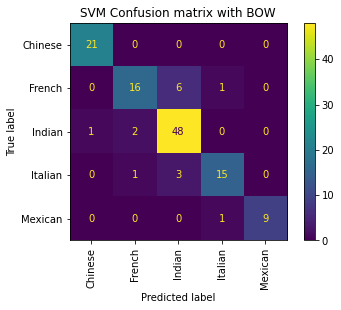


[The Accuracy by using cross validation]

Accuracy at Iteration: array([0]) -> 0.9047619047619048
Accuracy at Iteration: array([1]) -> 0.8809523809523809
Accuracy at Iteration: array([2]) -> 0.8536585365853658
Accuracy at Iteration: array([3]) -> 0.7804878048780488
Accuracy at Iteration: array([4]) -> 0.9512195121951219
Accuracy at Iteration: array([5]) -> 0.8780487804878049
Accuracy at Iteration: array([6, 7]) -> 0.926829268292683
Accuracy at Iteration: array([6, 7]) -> 0.926829268292683
Accuracy at Iteration: array([8, 9]) -> 0.9024390243902439
Accuracy at Iteration: array([8, 9]) -> 0.9024390243902439
Total accuracy of SVM with BOW: 0.89 (+/- 0.09)
Accuracy for  SVM with BOW and LDA :->  0.6209677419354839
              precision    recall  f1-score   support

     Chinese       0.66      1.00      0.79        21
      French       0.00      0.00      0.00        23
      Indian       0.62      0.88      0.73        51
     Italian       0.55      0.58      0.56        19
     Mexi

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


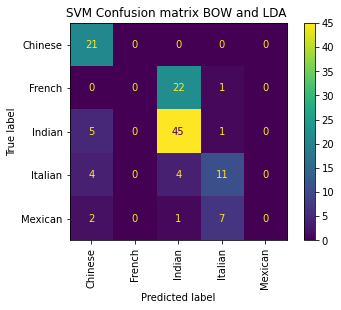


[The Accuracy by using cross validation]

Accuracy at Iteration: array([0]) -> 0.5714285714285714
Accuracy at Iteration: array([1]) -> 0.5952380952380952
Accuracy at Iteration: array([2, 5, 7, 8]) -> 0.6097560975609756
Accuracy at Iteration: array([3, 4]) -> 0.5365853658536586
Accuracy at Iteration: array([3, 4]) -> 0.5365853658536586
Accuracy at Iteration: array([2, 5, 7, 8]) -> 0.6097560975609756
Accuracy at Iteration: array([6, 9]) -> 0.6341463414634146
Accuracy at Iteration: array([2, 5, 7, 8]) -> 0.6097560975609756
Accuracy at Iteration: array([2, 5, 7, 8]) -> 0.6097560975609756
Accuracy at Iteration: array([6, 9]) -> 0.6341463414634146
Total accuracyof SVM with BOW and LDA: 0.59 (+/- 0.07)
Accuracy for SVM with BOW, TF-idf and LDA :->  0.6129032258064516
              precision    recall  f1-score   support

     Chinese       0.68      1.00      0.81        21
      French       0.00      0.00      0.00        23
      Indian       0.63      0.88      0.74        51
     Italia

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


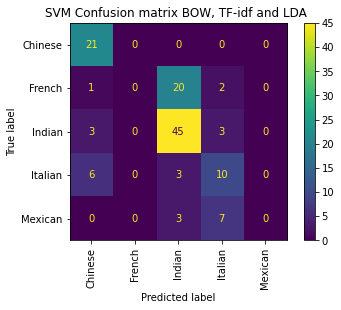


[The Accuracy by using cross validation]

Accuracy at Iteration: array([0]) -> 0.6190476190476191
Accuracy at Iteration: array([1]) -> 0.4523809523809524
Accuracy at Iteration: array([2]) -> 0.6097560975609756
Accuracy at Iteration: array([3]) -> 0.43902439024390244
Accuracy at Iteration: array([4, 7]) -> 0.5121951219512195
Accuracy at Iteration: array([5, 8]) -> 0.4634146341463415
Accuracy at Iteration: array([6]) -> 0.5609756097560976
Accuracy at Iteration: array([4, 7]) -> 0.5121951219512195
Accuracy at Iteration: array([5, 8]) -> 0.4634146341463415
Accuracy at Iteration: array([9]) -> 0.4878048780487805
Total accuracy of SVM with BOW, TF-idf and LDA: 0.51 (+/- 0.12)
Accuracy for SVM with BOW and TF-idf :->  0.9032258064516129
              precision    recall  f1-score   support

     Chinese       0.88      1.00      0.93        21
      French       1.00      0.70      0.82        23
      Indian       0.89      0.98      0.93        51
     Italian       0.85      0.89      0.8

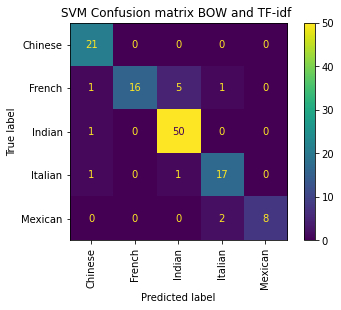


[The Accuracy by using cross validation]

Accuracy at Iteration : array([0]) -> 0.9523809523809523
Accuracy at Iteration : array([1]) -> 0.8571428571428571
Accuracy at Iteration : array([2, 3]) -> 0.926829268292683
Accuracy at Iteration : array([2, 3]) -> 0.926829268292683
Accuracy at Iteration : array([4, 6]) -> 0.975609756097561
Accuracy at Iteration : array([5, 7, 9]) -> 0.9024390243902439
Accuracy at Iteration : array([4, 6]) -> 0.975609756097561
Accuracy at Iteration : array([5, 7, 9]) -> 0.9024390243902439
Accuracy at Iteration : array([8]) -> 0.9512195121951219
Accuracy at Iteration : array([5, 7, 9]) -> 0.9024390243902439
Total accuracy of SVM with BOW and TF-idf: 0.93 (+/- 0.07)


In [29]:

#___________________________ SVM __________________________
#  SVM with LDA
from sklearn.decomposition import LatentDirichletAllocation
    # ('lda',LatentDirichletAllocation(n_components=5,random_state=0)),
#_________________________ SVM with BOW______________________________
text_clf_svm = Pipeline([
    ('vect', CountVectorizer()),
    ('clf', svm.SVC(kernel='linear', C=1),)
])
text_clf_svm.fit(X_train,y_train)
test_svm =X_test
predicted_svm = text_clf_svm.predict(test_svm)
print("Accuracy for SVM with BOW :-> ",np.mean(predicted_svm == y_test))
print(metrics.classification_report(y_test, predicted_svm))
plot_confusion_matrix(text_clf_svm, X_test, y_test,xticks_rotation="vertical")
plt.title("SVM Confusion matrix with BOW")
plt.show()

print("\n[The Accuracy by using cross validation]\n")
cv = ShuffleSplit(n_splits=5, test_size=0.4, random_state=0)
kf = KFold(n_splits=10,shuffle=True,random_state=0)
scores_svm = cross_val_score(text_clf_svm, X, y, cv=kf)
for i in scores_svm:
  print("Accuracy at Iteration: %r ->"%(np.where(scores_svm == i)),i)
print("Total accuracy of SVM with BOW: %0.2f (+/- %0.2f)" % (scores_svm.mean(), scores_svm.std() * 2))


#_________________________ SVM with BOW and LDA______________________________

text_clf_svm = Pipeline([
        ('vect', CountVectorizer()),
('lda',LatentDirichletAllocation(n_components=5,random_state=0)),
    ('clf', svm.SVC(kernel='linear', C=1),)
])
text_clf_svm.fit(X_train,y_train)
test_svm =X_test
predicted_svm = text_clf_svm.predict(test_svm)
print("Accuracy for  SVM with BOW and LDA :-> ",np.mean(predicted_svm == y_test))
print(metrics.classification_report(y_test, predicted_svm))
plot_confusion_matrix(text_clf_svm, X_test, y_test,xticks_rotation="vertical")
plt.title("SVM Confusion matrix BOW and LDA ")
plt.show()

print("\n[The Accuracy by using cross validation]\n")
cv = ShuffleSplit(n_splits=5, test_size=0.4, random_state=0)
kf = KFold(n_splits=10,shuffle=True,random_state=0)
scores_svm = cross_val_score(text_clf_svm, X, y, cv=kf)
for i in scores_svm:
  print("Accuracy at Iteration: %r ->"%(np.where(scores_svm == i)),i)
print("Total accuracyof SVM with BOW and LDA: %0.2f (+/- %0.2f)" % (scores_svm.mean(), scores_svm.std() * 2))

#_________________________ SVM with BOW, tf-idf and LDA______________________________
text_clf_svm = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('lda',LatentDirichletAllocation(n_components=5,random_state=0)),
    ('clf', svm.SVC(kernel='linear', C=1),)
])
text_clf_svm.fit(X_train,y_train)
test_svm =X_test
predicted_svm = text_clf_svm.predict(test_svm)
print("Accuracy for SVM with BOW, TF-idf and LDA :-> ",np.mean(predicted_svm == y_test))
print(metrics.classification_report(y_test, predicted_svm))
plot_confusion_matrix(text_clf_svm, X_test, y_test,xticks_rotation="vertical")
plt.title("SVM Confusion matrix BOW, TF-idf and LDA ")
plt.show()

print("\n[The Accuracy by using cross validation]\n")
cv = ShuffleSplit(n_splits=5, test_size=0.4, random_state=0)
kf = KFold(n_splits=10,shuffle=True,random_state=0)
scores_svm = cross_val_score(text_clf_svm, X, y, cv=kf)
for i in scores_svm:
  print("Accuracy at Iteration: %r ->"%(np.where(scores_svm == i)),i)
print("Total accuracy of SVM with BOW, TF-idf and LDA: %0.2f (+/- %0.2f)" % (scores_svm.mean(), scores_svm.std() * 2))


#_________________________ SVM with BOW and tf-idf______________________________

text_clf_svm = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', svm.SVC(kernel='linear', C=1),)
])
text_clf_svm.fit(X_train,y_train)
test_svm =X_test
predicted_svm = text_clf_svm.predict(test_svm)
print("Accuracy for SVM with BOW and TF-idf :-> ",np.mean(predicted_svm == y_test))
print(metrics.classification_report(y_test, predicted_svm))
plot_confusion_matrix(text_clf_svm, X_test, y_test,xticks_rotation="vertical")
plt.title("SVM Confusion matrix BOW and TF-idf ")
plt.show()

print("\n[The Accuracy by using cross validation]\n")
cv = ShuffleSplit(n_splits=5, test_size=0.4, random_state=0)
kf = KFold(n_splits=10,shuffle=True,random_state=0)
scores_svm = cross_val_score(text_clf_svm, X, y, cv=kf)
for i in scores_svm:
  print("Accuracy at Iteration : %r ->"%(np.where(scores_svm == i)),i)
print("Total accuracy of SVM with BOW and TF-idf: %0.2f (+/- %0.2f)" % (scores_svm.mean(), scores_svm.std() * 2))


#Classification and Evaluation for Decision Tree

Accuracy for DecisionTree with BOW and LDA:->  0.5564516129032258
              precision    recall  f1-score   support

     Chinese       0.72      0.86      0.78        21
      French       0.31      0.39      0.35        23
      Indian       0.64      0.57      0.60        51
     Italian       0.58      0.37      0.45        19
     Mexican       0.46      0.60      0.52        10

    accuracy                           0.56       124
   macro avg       0.54      0.56      0.54       124
weighted avg       0.57      0.56      0.56       124



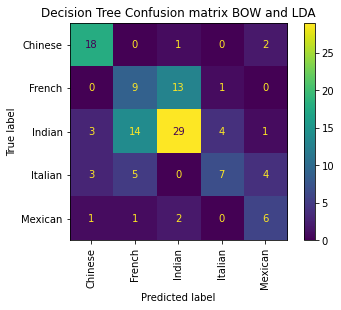


[The Accuracy by using cross validation]

Accuracy at Iteration: array([0]) -> 0.4523809523809524
Accuracy at Iteration: array([1]) -> 0.3333333333333333
Accuracy at Iteration: array([2]) -> 0.43902439024390244
Accuracy at Iteration: array([3]) -> 0.36585365853658536
Accuracy at Iteration: array([4]) -> 0.34146341463414637
Accuracy at Iteration: array([5]) -> 0.5609756097560976
Accuracy at Iteration: array([6]) -> 0.5121951219512195
Accuracy at Iteration: array([7, 8]) -> 0.4878048780487805
Accuracy at Iteration: array([7, 8]) -> 0.4878048780487805
Accuracy at Iteration: array([9]) -> 0.5365853658536586
Total accuracy of Decision Tree with BOW and LDA : 0.45 (+/- 0.15)
Accuracy for DecisionTree with BOW, LDA and TF-idf:->  0.41935483870967744
              precision    recall  f1-score   support

     Chinese       0.59      0.76      0.67        21
      French       0.16      0.17      0.17        23
      Indian       0.49      0.51      0.50        51
     Italian       0.67      

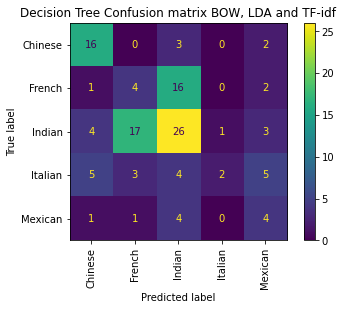


[The Accuracy by using cross validation]

Accuracy at Iteration: array([0]) -> 0.5
Accuracy at Iteration: array([1]) -> 0.30952380952380953
Accuracy at Iteration: array([2]) -> 0.5121951219512195
Accuracy at Iteration: array([3]) -> 0.34146341463414637
Accuracy at Iteration: array([4]) -> 0.2682926829268293
Accuracy at Iteration: array([5]) -> 0.1951219512195122
Accuracy at Iteration: array([6]) -> 0.4878048780487805
Accuracy at Iteration: array([7]) -> 0.4634146341463415
Accuracy at Iteration: array([8, 9]) -> 0.24390243902439024
Accuracy at Iteration: array([8, 9]) -> 0.24390243902439024
Total accuracy of Decision Tree with BOW, LDA and TF-idf : 0.36 (+/- 0.23)
Accuracy for DecisionTree with BOW and TF-idf:->  0.7258064516129032
              precision    recall  f1-score   support

     Chinese       0.75      0.86      0.80        21
      French       0.68      0.57      0.62        23
      Indian       0.78      0.82      0.80        51
     Italian       0.69      0.58      0.

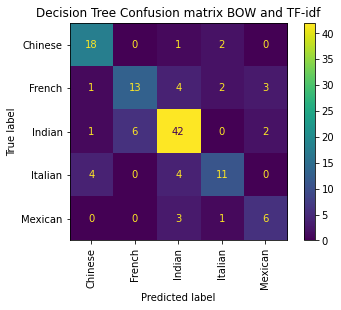


[The Accuracy by using cross validation]

Accuracy at Iteration: array([0]) -> 0.7380952380952381
Accuracy at Iteration: array([1]) -> 0.7142857142857143
Accuracy at Iteration: array([2, 6, 8, 9]) -> 0.7317073170731707
Accuracy at Iteration: array([3]) -> 0.6097560975609756
Accuracy at Iteration: array([4]) -> 0.6341463414634146
Accuracy at Iteration: array([5]) -> 0.7073170731707317
Accuracy at Iteration: array([2, 6, 8, 9]) -> 0.7317073170731707
Accuracy at Iteration: array([7]) -> 0.8048780487804879
Accuracy at Iteration: array([2, 6, 8, 9]) -> 0.7317073170731707
Accuracy at Iteration: array([2, 6, 8, 9]) -> 0.7317073170731707
Total accuracy of Decision Tree with BOW and TF-idf : 0.71 (+/- 0.10)
Accuracy for DecisionTree with BOW :->  0.8064516129032258
              precision    recall  f1-score   support

     Chinese       0.89      0.81      0.85        21
      French       0.80      0.52      0.63        23
      Indian       0.79      0.90      0.84        51
     Italian   

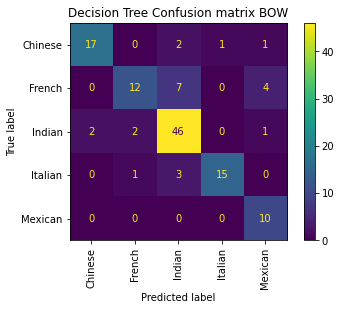


[The Accuracy by using cross validation]

Accuracy at Iteration: array([0]) -> 0.8095238095238095
Accuracy at Iteration: array([1]) -> 0.7619047619047619
Accuracy at Iteration: array([2, 5]) -> 0.7073170731707317
Accuracy at Iteration: array([3]) -> 0.6829268292682927
Accuracy at Iteration: array([4, 8, 9]) -> 0.7560975609756098
Accuracy at Iteration: array([2, 5]) -> 0.7073170731707317
Accuracy at Iteration: array([6, 7]) -> 0.8048780487804879
Accuracy at Iteration: array([6, 7]) -> 0.8048780487804879
Accuracy at Iteration: array([4, 8, 9]) -> 0.7560975609756098
Accuracy at Iteration: array([4, 8, 9]) -> 0.7560975609756098
Total accuracy of Decision Tree with BOW: 0.75 (+/- 0.08)


In [30]:
#==================================================================================
#_____________________________ Decision Tree __________________________
#==================================================================================

#______________________________ Decision Tree with BOW + LDA ____________________________

text_clf_DT = Pipeline([
    ('vect', CountVectorizer()),
    ('lda',LatentDirichletAllocation(n_components=5,random_state=0)),
    ('clf', DecisionTreeClassifier(),)
])
text_clf_DT.fit(X_train,y_train)
test_DT =X_test
predicted_DT = text_clf_DT.predict(test_DT)
print("Accuracy for DecisionTree with BOW and LDA:-> ",np.mean(predicted_DT == y_test))
print(metrics.classification_report(y_test, predicted_DT))
plot_confusion_matrix(text_clf_DT, X_test, y_test,xticks_rotation="vertical")
plt.title("Decision Tree Confusion matrix BOW and LDA")
plt.show()

print("\n[The Accuracy by using cross validation]\n")
cv = ShuffleSplit(n_splits=5, test_size=0.4, random_state=0)
kf = KFold(n_splits=10,shuffle=True,random_state=0)
scores_DT = cross_val_score(text_clf_DT, X, y, cv=kf)
for i in scores_DT:
  print("Accuracy at Iteration: %r ->"%(np.where(scores_DT == i)),i)
print("Total accuracy of Decision Tree with BOW and LDA : %0.2f (+/- %0.2f)" % (scores_DT.mean(), scores_DT.std() * 2))



#______________________________ Decision Tree with BOW + LDA + TF-idf ____________________________

text_clf_DT = Pipeline([
    ('vect', CountVectorizer()),
        ('tfidf', TfidfTransformer()),
    ('lda',LatentDirichletAllocation(n_components=5,random_state=0)),
    ('clf', DecisionTreeClassifier(),)
])
text_clf_DT.fit(X_train,y_train)
test_DT =X_test
predicted_DT = text_clf_DT.predict(test_DT)
print("Accuracy for DecisionTree with BOW, LDA and TF-idf:-> ",np.mean(predicted_DT == y_test))
print(metrics.classification_report(y_test, predicted_DT))
plot_confusion_matrix(text_clf_DT, X_test, y_test,xticks_rotation="vertical")
plt.title("Decision Tree Confusion matrix BOW, LDA and TF-idf")
plt.show()

print("\n[The Accuracy by using cross validation]\n")
cv = ShuffleSplit(n_splits=5, test_size=0.4, random_state=0)
kf = KFold(n_splits=10,shuffle=True,random_state=0)
scores_DT = cross_val_score(text_clf_DT, X, y, cv=kf)
for i in scores_DT:
  print("Accuracy at Iteration: %r ->"%(np.where(scores_DT == i)),i)
print("Total accuracy of Decision Tree with BOW, LDA and TF-idf : %0.2f (+/- %0.2f)" % (scores_DT.mean(), scores_DT.std() * 2))


#______________________________ Decision Tree with BOW + TF-idf ____________________________

text_clf_DT = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', DecisionTreeClassifier(),)
])
text_clf_DT.fit(X_train,y_train)
test_DT =X_test
predicted_DT = text_clf_DT.predict(test_DT)
print("Accuracy for DecisionTree with BOW and TF-idf:-> ",np.mean(predicted_DT == y_test))
print(metrics.classification_report(y_test, predicted_DT))
plot_confusion_matrix(text_clf_DT, X_test, y_test,xticks_rotation="vertical")
plt.title("Decision Tree Confusion matrix BOW and TF-idf")
plt.show()

print("\n[The Accuracy by using cross validation]\n")
cv = ShuffleSplit(n_splits=5, test_size=0.4, random_state=0)
kf = KFold(n_splits=10,shuffle=True,random_state=0)
scores_DT = cross_val_score(text_clf_DT, X, y, cv=kf)
for i in scores_DT:
  print("Accuracy at Iteration: %r ->"%(np.where(scores_DT == i)),i)
print("Total accuracy of Decision Tree with BOW and TF-idf : %0.2f (+/- %0.2f)" % (scores_DT.mean(), scores_DT.std() * 2))

#______________________________ Decision Tree with BOW ____________________________

text_clf_DT = Pipeline([
    ('vect', CountVectorizer()),
    ('clf', DecisionTreeClassifier(),)
])
text_clf_DT.fit(X_train,y_train)
test_DT =X_test
predicted_DT = text_clf_DT.predict(test_DT)
print("Accuracy for DecisionTree with BOW :-> ",np.mean(predicted_DT == y_test))
print(metrics.classification_report(y_test, predicted_DT))
plot_confusion_matrix(text_clf_DT, X_test, y_test,xticks_rotation="vertical")
plt.title("Decision Tree Confusion matrix BOW")
plt.show()

print("\n[The Accuracy by using cross validation]\n")
cv = ShuffleSplit(n_splits=5, test_size=0.4, random_state=0)
kf = KFold(n_splits=10,shuffle=True,random_state=0)
scores_DT = cross_val_score(text_clf_DT, X, y, cv=kf)
for i in scores_DT:
  print("Accuracy at Iteration: %r ->"%(np.where(scores_DT == i)),i)
print("Total accuracy of Decision Tree with BOW: %0.2f (+/- %0.2f)" % (scores_DT.mean(), scores_DT.std() * 2))





# Selec Best Model And Save It

In [31]:
import joblib 
filename = 'finalized_model.sav'
joblib.dump(text_clf_svm, filename)

['finalized_model.sav']

# Save Finial Data

In [32]:
Final_Data=pd.DataFrame(([X,Y,xx,yy,zz] for X,Y,xx, yy,zz in zip(df["Dish"],clusters["ing"],df["URL"],clusters["class"],cuisine)),columns = ["Dish","Ingredients","URL","Class","Cuisine"])
Final_Data.to_csv("Final_Data.csv")
